Dynamic Contrast-Enhanced (DCE) MRI Reconstruction Demo

Author:

  * Zhengguo Tan <zhengguo.tan@gmail.com>

# 1. Setup

## Connect to a GPU on `Google Colab`

  * Go to `Edit` > `Notebook settings` > select `GPU` > click `Save`;
  * Now we can verify that we allocate a GPU for this notebook.

In [1]:
!nvidia-smi
!nvcc --version

Tue Jun 13 07:48:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install SigPy

  * The original [SigPy](https://github.com/mikgroup/sigpy.git) was fored for the development of HD-MRI reconstruction and is available here: https://github.com/ZhengguoTan/sigpy.git

In [2]:
!git clone https://github.com/ZhengguoTan/sigpy.git

Cloning into 'sigpy'...
remote: Enumerating objects: 6378, done.
remote: Counting objects: 100% (914/914), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 6378 (delta 624), reused 801 (delta 564), pack-reused 5464
Receiving objects: 100% (6378/6378), 3.82 MiB | 3.91 MiB/s, done.
Resolving deltas: 100% (4644/4644), done.


In [3]:
%cd /content/sigpy
!git log -1

/content/sigpy
commit 5eb1b5306ff10158c0292974365e5039772767b8 (HEAD -> master, origin/master, origin/HEAD)
Author: Zhengguo Tan <zhengguo.tan@gmail.com>
Date:   Tue Jun 13 00:14:51 2023 +0200

    rename


In [4]:
!pip install -e /content/sigpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/sigpy
  Preparing metadata (setup.py) ... done
  Running setup.py develop for sigpy


# 2. Get Simulation Data

In [5]:
%%bash

cd /content/
pwd

git clone https://github.com/ZhengguoTan/demo_dce_recon.git

# mkdir /content/data && cd "$_"
# pwd

# wget -q https://github.com/ZhengguoTan/demo_dce_recon/blob/main/data/BC18_DCE_sim/img.npy
# wget -q https://github.com/ZhengguoTan/demo_dce_recon/blob/main/data/BC18_DCE_sim/mps.npy

cd /content/sigpy

/content


Cloning into 'demo_dce_recon'...


In [9]:
DATA_DIR = '/content/demo_dce_recon/data/BC18_DCE_sim/'

# 3. Prepare Data

In [10]:
import numpy as np

import sigpy as sp
from sigpy import linop, util
from sigpy.mri import app

import matplotlib.pyplot as plt

In [12]:
orig_img = np.load(DATA_DIR + 'img.npy').transpose(2, 0, 1)
orig_mps = np.load(DATA_DIR + 'mps.npy').transpose(2, 0, 1)

orig_img = np.flip(orig_img, axis=2)
orig_mps = np.flip(orig_mps, axis=2)

print(str(orig_img.shape))
print(str(orig_mps.shape))

N_time = orig_img.shape[0]
N_coil = orig_mps.shape[0]

N_y, N_x = orig_mps.shape[-2:]


(22, 320, 320)
(16, 320, 320)


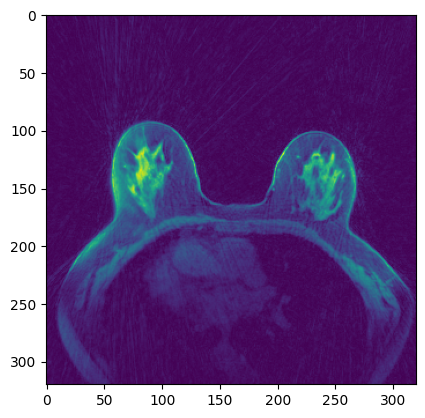

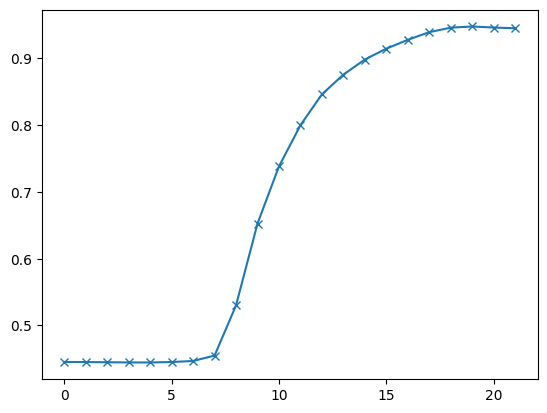

In [13]:
# plot one pixel
pltx = 121
plty = 233

plt.imshow(np.abs(np.squeeze(orig_img[0, ...])))
plt.show()

plt.plot(np.abs(orig_img[:, pltx, plty]), '-x')
plt.show()

## Create multi-coil multi-frame k-space data

In [14]:
tmp = np.expand_dims(orig_img, axis=1)

orig_mpsimg = tmp * orig_mps

orig_ksp = sp.fft(orig_mpsimg, axes=(-2, -1))

print(str(orig_ksp.shape))

(22, 16, 320, 320)


# 4. Cartesian fully-sampling and SENSE reconstruciton

In [17]:
cartes1_pi = []

for n in range(0, N_time):
  ksp1 = orig_ksp[n, ...]
  R = app.SenseRecon(ksp1, orig_mps,
                     0.01, max_iter=20,
                     device=sp.Device(0)).run()

  cartes1_pi.append(sp.to_device(R))

cartes1_pi = np.array(cartes1_pi)

print(cartes1_pi.shape)

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

(22, 320, 320)


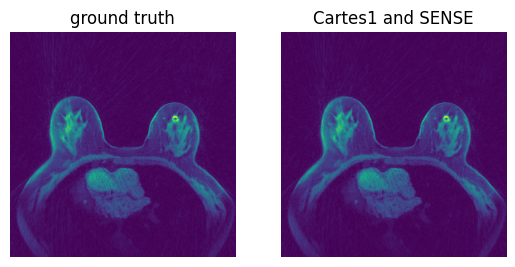

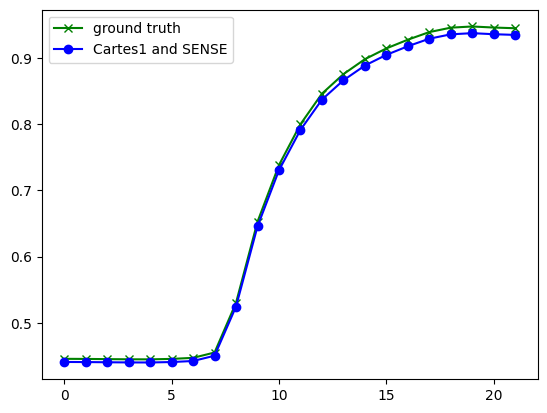

In [18]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(np.squeeze(orig_img[10, ...])))
plt.axis('off')
plt.title('ground truth')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(np.abs(np.squeeze(cartes1_pi[10, ...])))
plt.axis('off')
plt.title('Cartes1 and SENSE')

plt.show()


plt.plot(np.abs(orig_img[:, pltx, plty]), '-x', color='g', label='ground truth')
plt.plot(np.abs(cartes1_pi[:, pltx, plty]), '-o', color='b', label='Cartes1 and SENSE')

plt.legend(loc=0)
plt.show()

# 5. Cartesian 8-fold undersampling

## Undersampling

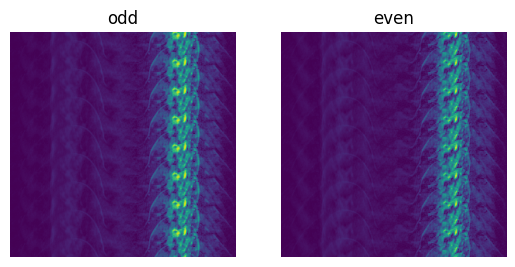

In [19]:
cartesx_ksp = np.zeros_like(orig_ksp)

unsamp_factor = 8
shift_cnt = 0

for f in range(N_time):
  ind = np.arange(shift_cnt, orig_ksp.shape[-2], unsamp_factor)
  cartesx_ksp[f, :, ind, :] = orig_ksp[f, :, ind, :]
  shift_cnt = (shift_cnt + 1) % unsamp_factor

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
K0 = np.abs(sp.ifft(np.squeeze(cartesx_ksp[0, 0, ...])))
plt.imshow(K0)
plt.axis('off')
plt.title('odd')

ax = fig.add_subplot(1, 2, 2)
K1 = np.abs(sp.ifft(np.squeeze(cartesx_ksp[1, 0, ...])))
plt.imshow(K1)
plt.axis('off')
plt.title('even')

plt.show()

## SENSE Reconstruction

In [20]:
cartesx_pi = []
for n in range(0, N_time):
  ksp1 = cartesx_ksp[n, ...]
  R = app.SenseRecon(ksp1, orig_mps,
                     0.01, max_iter=20,
                     device=sp.Device(0)).run()

  cartesx_pi.append(sp.to_device(R))

cartesx_pi = np.array(cartesx_pi)

print(cartesx_pi.shape)

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

(22, 320, 320)


## Temporal TV Regularized Reconstruction

In [21]:
cartesx_ksp6 = cartesx_ksp[:, None, :, None, :, :]
orig_mps4 = orig_mps[:, None, :, :]

cartesx_tv = app.HighDimensionalRecon(cartesx_ksp6, orig_mps4,
                        combine_echo=False,
                        lamda=0.001,
                        regu='TV', regu_axes=[0],
                        max_iter=10,
                        solver='ADMM', rho=0.1,
                        device=sp.Device(0),
                        show_pbar=False,
                        verbose=True).run()

cartesx_tv = sp.to_device(cartesx_tv)

print(cartesx_tv.shape)

  cg iter:  0; resid:     21.129223
  cg iter:  1; resid:     12.622961
  cg iter:  2; resid:     11.024918
  cg iter:  3; resid:      9.093545
  cg iter:  4; resid:      6.673772
  cg iter:  5; resid:      3.997248
  cg iter:  6; resid:      2.875371
  cg iter:  7; resid:      2.327926
  cg iter:  8; resid:      1.864238
  cg iter:  9; resid:      1.864238
admm iter:  1, r norm:     9.7865, eps pri:     0.1722, s norm:     1.5786, eps dual:     0.1501
  cg iter:  0; resid:      1.203860
  cg iter:  1; resid:      1.000782
  cg iter:  2; resid:      0.818029
  cg iter:  3; resid:      0.718882
  cg iter:  4; resid:      0.655584
  cg iter:  5; resid:      0.561430
  cg iter:  6; resid:      0.454625
  cg iter:  7; resid:      0.379408
  cg iter:  8; resid:      0.338491
  cg iter:  9; resid:      0.338491
admm iter:  2, r norm:     6.3402, eps pri:     0.1728, s norm:     0.7817, eps dual:     0.1511
  cg iter:  0; resid:      0.534547
  cg iter:  1; resid:      0.412232
  cg iter:  2;

## Plot results

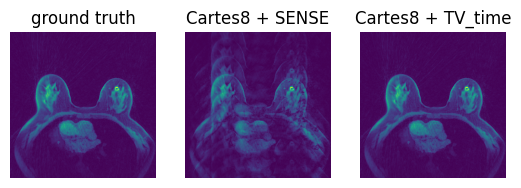

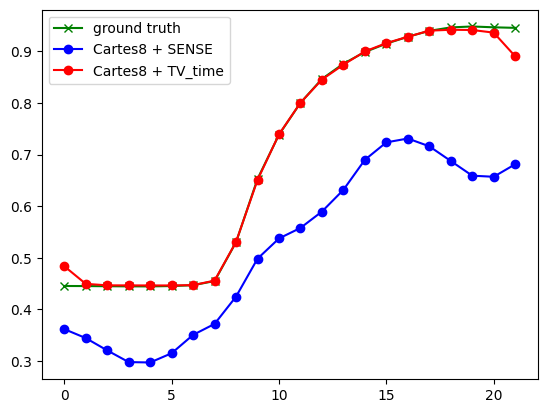

In [23]:
fig = plt.figure()

ax = fig.add_subplot(1, 3, 1)
plt.imshow(np.abs(np.squeeze(orig_img[10, ...])))
plt.axis('off')
plt.title('ground truth')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(np.abs(np.squeeze(cartesx_pi[10, ...])))
plt.axis('off')
plt.title('Cartes' + str(unsamp_factor) + ' + SENSE')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(np.abs(np.squeeze(cartesx_tv[10, ...])))
plt.axis('off')
plt.title('Cartes' + str(unsamp_factor) + ' + TV_time')
plt.show()


plt.plot(np.abs(orig_img[:, pltx, plty]), '-x', color='g', label='ground truth')
plt.plot(np.abs(cartesx_pi[:, pltx, plty]), '-o', color='b', label='Cartes' + str(unsamp_factor) + ' + SENSE')
plt.plot(np.abs(np.squeeze(cartesx_tv[:, ..., pltx, plty])), '-o', color='r', label='Cartes' + str(unsamp_factor) + ' + TV_time')

plt.legend(loc=0)
plt.show()

# 6. Radial sampling with 13 spokes per frame

## Create radial trajectory

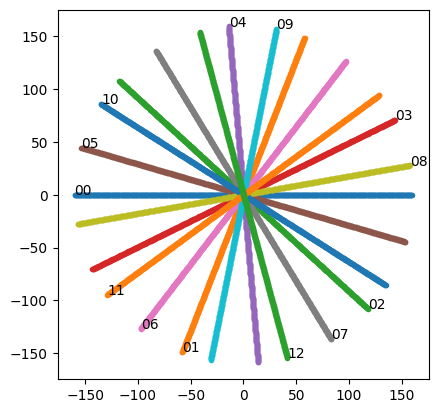

In [24]:
N_spokes = 13

N_tot_spokes = N_spokes * N_time

base_res = N_x
N_samples = base_res * 2

base_lin = np.arange(N_samples).reshape(1, -1) - base_res

tau = 0.5 * (1 + 5**0.5)
base_rad = np.pi / (2 + tau - 1)

base_rot = np.arange(N_tot_spokes).reshape(-1, 1) * base_rad

traj = np.zeros((N_tot_spokes, N_samples, 2))
traj[..., 0] = np.cos(base_rot) @ base_lin
traj[..., 1] = np.sin(base_rot) @ base_lin

traj = traj / 2

fig = plt.figure()
ax = fig.add_subplot(111)

for f in range(N_spokes):
    plt.plot(traj[f, :, 0], traj[f, :, 1], '.', label=str(f).zfill(2))
    plt.text(traj[f, 0, 0], traj[f, 0, 1], str(f).zfill(2))

ax.set_aspect('equal', adjustable='box')

plt.show()

## Test NUFFT

(22, 13, 640, 2)
F ishape: [16, 320, 320]
F oshape: [16, 13, 640]
(16, 320, 320)


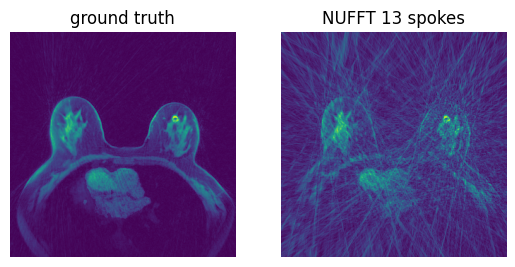

In [25]:
traj_t = traj.reshape(N_time, N_spokes, N_samples, 2)

print(str(traj_t.shape))

traj_r = traj_t[10, ...]


F = linop.NUFFT(orig_mps.shape, traj_r)
dcf = (traj_r[..., 0]**2 + traj_r[..., 1]**2)**0.5

temp_img = sp.ifft(orig_ksp, axes=(-2, -1))[10, ...]  # one image frame
temp_ksp = F * temp_img
temp_img_FH = F.H * (temp_ksp * dcf)

print('F ishape: ' + str(F.ishape))
print('F oshape: ' + str(F.oshape))

print(str(temp_img_FH.shape))
temp_img_FH_rss = np.sum(np.abs(temp_img_FH)**2, axis=0)**0.5

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(np.squeeze(orig_img[10, ...])))
plt.axis('off')
plt.title('ground truth')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(temp_img_FH_rss)
plt.axis('off')
plt.title('NUFFT ' + str(N_spokes) + ' spokes')

plt.show()

## Create undersampled radial k-space data

In [26]:
radialx_ksp = np.zeros([N_time, N_coil, N_spokes, N_samples], dtype=complex)

for n in range(0, N_time):
  traj_r = traj_t[n, ...]
  temp_i = sp.ifft(orig_ksp, axes=(-2, -1))[n, ...]
  F = linop.NUFFT(orig_mps.shape, traj_r)
  radialx_ksp[n, ...] = F * temp_i

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.imshow(np.abs(radialx_ksp[10, 0, ...]))
plt.axis('off')
plt.show()

print(np.max(np.abs(radialx_ksp)))
print(np.min(np.abs(radialx_ksp)))

2.6899517071777597
4.117495914072329e-06


## Add noise to k-space data

(22, 16, 13, 640)


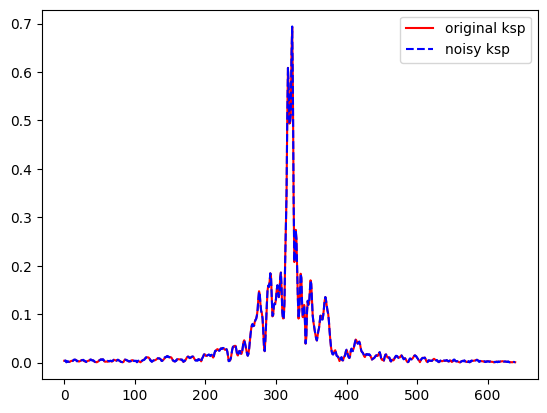

In [27]:
noise = 0.001 * util.randn(radialx_ksp.shape, dtype=radialx_ksp.dtype)
radialx_ksp_n = radialx_ksp + noise

print(str(radialx_ksp.shape))

plt.plot(np.abs(radialx_ksp[10, 0, 7, :]), '-', color='r', label='original ksp')
plt.plot(np.abs(radialx_ksp_n[10, 0, 7, :]), '--', color='b', label='noisy ksp')

plt.legend(loc=0)
plt.show()

## Radial SENSE Reconstruction

In [28]:
radialx_pi = []
for n in range(0, N_time):
  ksp1 = radialx_ksp_n[n, ...]
  trj1 = traj_t[n, ...]
  R = app.SenseRecon(ksp1, orig_mps,
                     coord=trj1,
                     lamda=0.01, max_iter=20,
                     device=sp.Device(0)).run()

  radialx_pi.append(sp.to_device(R))

radialx_pi = np.array(radialx_pi)

print(radialx_pi.shape)

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/20 [00:00<?, ?it/s]

(22, 320, 320)


## Temporal TV Regularized Reconstruction

In [30]:
radialx_ksp6 = radialx_ksp_n[:, None, :, None, :, :]
orig_mps4 = orig_mps[:, None, :, :]
print(traj_t.shape)

radialx_tv = app.HighDimensionalRecon(radialx_ksp6, orig_mps4,
                        combine_echo=False,
                        lamda=0.001,
                        coord=traj_t,
                        regu='TV', regu_axes=[0],
                        max_iter=10,
                        solver='ADMM', rho=0.1,
                        device=sp.Device(0),
                        show_pbar=False,
                        verbose=True).run()

radialx_tv = sp.to_device(radialx_tv)
print(radialx_tv.shape)

(22, 13, 640, 2)
  cg iter:  0; resid:     24.965153
  cg iter:  1; resid:     13.298414
  cg iter:  2; resid:      6.975401
  cg iter:  3; resid:      3.756936
  cg iter:  4; resid:      2.856940
  cg iter:  5; resid:      2.389779
  cg iter:  6; resid:      2.142011
  cg iter:  7; resid:      1.314679
  cg iter:  8; resid:      1.242450
  cg iter:  9; resid:      1.242450
admm iter:  1, r norm:     3.3956, eps pri:     0.1538, s norm:     0.0860, eps dual:     0.1501
  cg iter:  0; resid:      1.361712
  cg iter:  1; resid:      1.037239
  cg iter:  2; resid:      0.990490
  cg iter:  3; resid:      0.929159
  cg iter:  4; resid:      0.870981
  cg iter:  5; resid:      0.769196
  cg iter:  6; resid:      0.665457
  cg iter:  7; resid:      0.657292
  cg iter:  8; resid:      0.497905
  cg iter:  9; resid:      0.497905
admm iter:  2, r norm:     2.7741, eps pri:     0.1535, s norm:     0.1130, eps dual:     0.1504
  cg iter:  0; resid:      0.795578
  cg iter:  1; resid:      0.8276

## Plot results

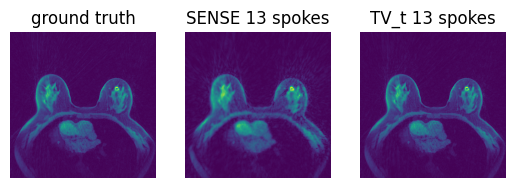

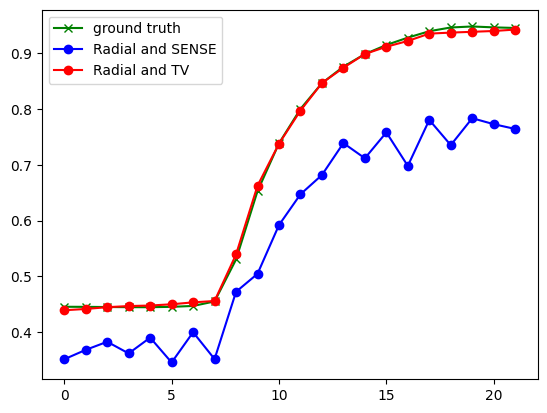

In [31]:
radialx_tv = np.squeeze(radialx_tv)

fig = plt.figure()

ax = fig.add_subplot(1, 3, 1)
plt.imshow(np.abs(np.squeeze(orig_img[10, ...])))
plt.axis('off')
plt.title('ground truth')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(np.abs(np.squeeze(radialx_pi[10, ...])))
plt.axis('off')
plt.title('SENSE ' + str(N_spokes) + ' spokes')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(np.abs(np.squeeze(radialx_tv[10, ...])))
plt.axis('off')
plt.title('TV_t ' + str(N_spokes) + ' spokes')

plt.show()


fig = plt.figure()

plt.plot(np.abs(orig_img[:, pltx, plty]), '-x', color='g', label='ground truth')
plt.plot(np.abs(radialx_pi[:, pltx, plty]), '-o', color='b', label='Radial and SENSE')
plt.plot(np.abs(radialx_tv[:, pltx, plty]), '-o', color='r', label='Radial and TV')

plt.legend(loc=0)
plt.show()

# Thank You for Your Attention!